In [19]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ganiyuopeyemi/desktop/NLP/denn_bawl_german.txt', error_bad_lines=False)
df.head()

,WORD,Val,Val_sd,joy,joy_sd,anger,anger_sd,sadness,sadness_sd,fear,fear_sd,disgust,disgust_sd
0,abart,"-1,6","0,6992059","1,4762","0,98076744","1,7143","1,0556","1,7143","1,1019","1,8095","0,9284","2,4762","1,3645"
1,abbau,-1,"1,1697953","1,25","0,7163504","2,4","1,1425","2,35","1,2258","2,3","1,4179","1,5","0,8272"
2,abbild,"-0,2","0,63245553","1,8636","1,03718734","1,4545","1,0108","1,2273","0,5284","1,3636","0,9021","1,3182","0,9455"
3,abbruch,"-0,7","1,15950181","1,1","0,30779351","2,55","1,3169","1,7","0,9234","2,15","1,268","1,2","0,6959"
4,abdruck,"-0,1","0,31622777","1,4","0,75393703","1,2","0,5231","1,1","0,4472",1,0,1,0


In [3]:
df.shape

(1958, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WORD        1958 non-null   object
 1   Val         1958 non-null   object
 2   Val_sd      1958 non-null   object
 3   joy         1958 non-null   object
 4   joy_sd      1958 non-null   object
 5   anger       1958 non-null   object
 6   anger_sd    1958 non-null   object
 7   sadness     1958 non-null   object
 8   sadness_sd  1958 non-null   object
 9   fear        1958 non-null   object
 10  fear_sd     1958 non-null   object
 11  disgust     1958 non-null   object
 12  disgust_sd  1958 non-null   object
dtypes: object(13)
memory usage: 199.0+ KB


In [5]:
df = df.apply(lambda x: x.str.replace(',','.'))
cols = df.columns.drop("WORD")
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [6]:
#TC = '250kSentiArt_EN.xlsx' 
sa = pd.read_excel('/Users/ganiyuopeyemi/desktop/NLP/SentiArt-main/120kSentiArt_DE.xlsx') #    
print(sa)

              word      wordLC    AAPz  ang_z  fear_z  disg_z   hap_z   sad_z  \
0           Aachen      aachen  0.6557  0.097 -1.0980 -1.2940 -0.4470 -1.3020   
1              Aal         aal  0.3076  0.234 -0.4620  1.4168 -0.1940  0.1161   
2             Aale        aale  0.0619  0.218 -0.1440  0.4773 -0.1210 -0.1830   
3              Aas         aas -1.0440  0.258  0.1618  2.0333  0.3128  0.3957   
4       Aasfresser  aasfresser -1.5150  0.327  1.1859  1.9843  0.2766  0.6850   
...            ...         ...     ...    ...     ...     ...     ...     ...   
116308     üppigem     üppigem  2.1710  0.152 -1.6270 -0.1590  0.9881  0.3765   
116309     üppigen     üppigen  2.0481  0.127 -1.6160 -0.7360  0.4093  0.0004   
116310     üppiger     üppiger  2.0276  0.143 -1.5920 -0.6580  0.6143  0.1836   
116311   üppigeren   üppigeren  1.5157  0.078 -1.6630 -1.2940 -0.3500 -0.7420   
116312     üppiges     üppiges  1.6386  0.134 -1.5450 -0.3550  0.6625 -0.1350   

        surp_z  
0      -0.

In [7]:
word_AAPz = []
word_ang_z = []
word_fear_z = []
word_disg_z = []
word_hap_z = []
word_sad_z = []
word_surp_z = []

In [8]:
for t in df.WORD:
    dt = sa.query('wordLC in @t')
    word_AAPz.append(dt.AAPz.mean())
    word_ang_z.append(dt.ang_z.mean())
    word_fear_z.append(dt.fear_z.mean())
    word_disg_z.append(dt.disg_z.mean())
    word_hap_z.append(dt.hap_z.mean())
    word_sad_z.append(dt.sad_z.mean())
    word_surp_z.append(dt.surp_z.mean())

In [9]:
df['AAPz'] = word_AAPz
df['ang_z'] = word_ang_z
df['fear_z'] = word_fear_z
df['disg_z'] = word_disg_z
df['hap_z'] = word_hap_z
df['sad_z'] = word_sad_z
df['surp_z'] = word_surp_z
df = round(df,3)

In [10]:
df.isna().sum()

WORD            0
Val             0
Val_sd          0
joy             0
joy_sd          0
anger           0
anger_sd        0
sadness         0
sadness_sd      0
fear            0
fear_sd         0
disgust         0
disgust_sd      0
AAPz          145
ang_z         145
fear_z        145
disg_z        145
hap_z         145
sad_z         145
surp_z        145
dtype: int64

In [11]:
df = df.drop(columns=['Val_sd','joy_sd','fear_sd','anger_sd','sadness_sd','disgust_sd'], axis=1)

In [12]:
df["target"] = df[["joy","anger","sadness","fear","disgust"]].idxmax(axis=1)

In [13]:
df["new_target"] = df[["ang_z","fear_z","disg_z","hap_z","sad_z"]].idxmax(axis=1)

In [14]:
df.head()

,WORD,Val,joy,anger,sadness,fear,disgust,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z,target,new_target
0,abart,-1.6,1.476,1.714,1.714,1.810,2.476,-1.003,0.263,-0.027,1.348,-0.507,0.550,0.650,disgust,disg_z
1,abbau,-1.0,1.250,2.400,2.350,2.300,1.500,-0.900,0.190,-0.497,-0.531,-1.713,-1.041,-2.129,anger,ang_z
2,abbild,-0.2,1.864,1.454,1.227,1.364,1.318,0.881,0.158,-0.639,0.194,-0.230,-0.154,-0.974,joy,disg_z
3,abbruch,-0.7,1.100,2.550,1.700,2.150,1.200,-0.552,0.174,-0.697,-0.540,-0.278,-0.366,-0.181,anger,ang_z
4,abdruck,-0.1,1.400,1.200,1.100,1.000,1.000,0.164,0.121,-1.780,-0.208,-0.977,-1.080,-1.194,joy,ang_z


In [15]:
df["new_target"] = df["new_target"].map({"hap_z": "joy", "ang_z": "anger", "fear_z": "fear", "disg_z": "disgust","sad_z": "sadness"})
df.head()

,WORD,Val,joy,anger,sadness,fear,disgust,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z,target,new_target
0,abart,-1.6,1.476,1.714,1.714,1.810,2.476,-1.003,0.263,-0.027,1.348,-0.507,0.550,0.650,disgust,disgust
1,abbau,-1.0,1.250,2.400,2.350,2.300,1.500,-0.900,0.190,-0.497,-0.531,-1.713,-1.041,-2.129,anger,anger
2,abbild,-0.2,1.864,1.454,1.227,1.364,1.318,0.881,0.158,-0.639,0.194,-0.230,-0.154,-0.974,joy,disgust
3,abbruch,-0.7,1.100,2.550,1.700,2.150,1.200,-0.552,0.174,-0.697,-0.540,-0.278,-0.366,-0.181,anger,anger
4,abdruck,-0.1,1.400,1.200,1.100,1.000,1.000,0.164,0.121,-1.780,-0.208,-0.977,-1.080,-1.194,joy,anger


Text(0, 0.5, 'Label')

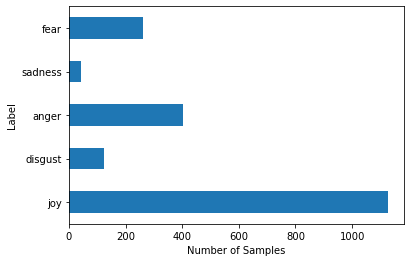

In [16]:
ax = df.target.value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Label")

Text(0, 0.5, 'Label')

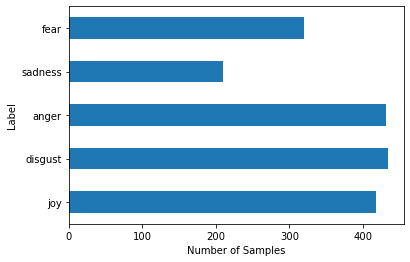

In [17]:
ax = df.new_target.value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Label")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WORD        1958 non-null   object 
 1   Val         1958 non-null   float64
 2   joy         1958 non-null   float64
 3   anger       1958 non-null   float64
 4   sadness     1958 non-null   float64
 5   fear        1958 non-null   float64
 6   disgust     1958 non-null   float64
 7   AAPz        1813 non-null   float64
 8   ang_z       1813 non-null   float64
 9   fear_z      1813 non-null   float64
 10  disg_z      1813 non-null   float64
 11  hap_z       1813 non-null   float64
 12  sad_z       1813 non-null   float64
 13  surp_z      1813 non-null   float64
 14  target      1958 non-null   object 
 15  new_target  1813 non-null   object 
dtypes: float64(13), object(3)
memory usage: 244.9+ KB


In [25]:
df = df.dropna().reset_index(drop=True)
df.head()

,WORD,Val,joy,anger,sadness,fear,disgust,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z,target,new_target
0,abart,-1.6,1.476,1.714,1.714,1.810,2.476,-1.003,0.263,-0.027,1.348,-0.507,0.550,0.650,disgust,disgust
1,abbau,-1.0,1.250,2.400,2.350,2.300,1.500,-0.900,0.190,-0.497,-0.531,-1.713,-1.041,-2.129,anger,anger
2,abbild,-0.2,1.864,1.454,1.227,1.364,1.318,0.881,0.158,-0.639,0.194,-0.230,-0.154,-0.974,joy,disgust
3,abbruch,-0.7,1.100,2.550,1.700,2.150,1.200,-0.552,0.174,-0.697,-0.540,-0.278,-0.366,-0.181,anger,anger
4,abdruck,-0.1,1.400,1.200,1.100,1.000,1.000,0.164,0.121,-1.780,-0.208,-0.977,-1.080,-1.194,joy,anger


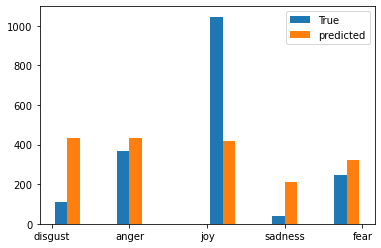

In [26]:
plt.hist([df.target, df.new_target], label=["True", "predicted"])
plt.legend(loc='upper right')
plt.show()

In [30]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics

f1_macro of SentiArt: 0.305
accuracy of SentiArt: 36.845 %


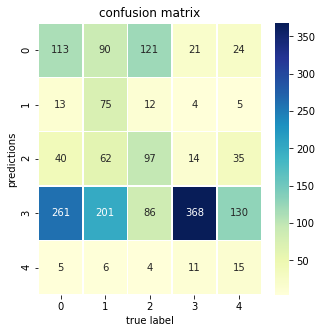

In [31]:
f1_macro = f1_score(df.target, df.new_target, average="macro")
acc = accuracy_score(df.target, df.new_target)*100
print("f1_macro of SentiArt:", round(f1_macro, 3))
print("accuracy of SentiArt:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(df.target, df.new_target)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [33]:
X = df["WORD"]
y_target = df["target"]
y_label = df["new_target"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [34]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# LogisticRegression 
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

In [35]:
print("Report of MultinomialNB")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB
Confusion Matrix 
 [[  0   0   0 144   0]
 [  0   0   0 116   0]
 [  0   0   0  95   0]
 [  0   0   0 128   0]
 [  0   0   0  61   0]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       144
     disgust       0.00      0.00      0.00       116
        fear       0.00      0.00      0.00        95
         joy       0.24      1.00      0.38       128
     sadness       0.00      0.00      0.00        61

    accuracy                           0.24       544
   macro avg       0.05      0.20      0.08       544
weighted avg       0.06      0.24      0.09       544

Accuracy Score:  0.23529411764705882


In [36]:
print("Report of LinearSVC")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC
Confusion Matrix 
 [[  0   0   0 144   0]
 [  0   0   0 116   0]
 [  0   0   0  95   0]
 [  0   0   0 128   0]
 [  0   0   0  61   0]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       144
     disgust       0.00      0.00      0.00       116
        fear       0.00      0.00      0.00        95
         joy       0.24      1.00      0.38       128
     sadness       0.00      0.00      0.00        61

    accuracy                           0.24       544
   macro avg       0.05      0.20      0.08       544
weighted avg       0.06      0.24      0.09       544

Accuracy Score:  0.23529411764705882


In [37]:
print("Report of LogisticRegression")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression
Confusion Matrix 
 [[  0   0   0 144   0]
 [  0   0   0 116   0]
 [  0   0   0  95   0]
 [  0   0   0 128   0]
 [  0   0   0  61   0]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       144
     disgust       0.00      0.00      0.00       116
        fear       0.00      0.00      0.00        95
         joy       0.24      1.00      0.38       128
     sadness       0.00      0.00      0.00        61

    accuracy                           0.24       544
   macro avg       0.05      0.20      0.08       544
weighted avg       0.06      0.24      0.09       544

Accuracy Score:  0.23529411764705882
